# Debug extract features

In [109]:
from utils import extract_features

In [2]:
path_rttm = "AMITest/test"
enrolls = extract_features.make_enrolls(path_rttm)

100%|███████████████████████████████████████████████████████████████████████████████████| 16/16 [00:05<00:00,  2.79it/s]


In [110]:
from resemblyzer import VoiceEncoder

root = "debug_make_trainpart"
path_corpus = "AMITest/amicorpus"
embedder = VoiceEncoder()
extract_features.make_trainpart(root, path_corpus, path_rttm, enrolls, embedder, is_debug=True)

Loaded the voice encoder model on cpu in 0.22 seconds.


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12157.40it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12264.05it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12372.58it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14820.86it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16513.01it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14979.66it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15252.01it/s]
0it [00:00, ?it/s]
100%|███████████████

In [111]:
from IPython.display import Audio as IPythonAudio
import librosa

SAMPLE_RATE = 16000
path = 'debug_make_trainpart/custom_train_pvad/data/train946/audio.wav'
waveform, _ = librosa.load(path, sr=SAMPLE_RATE)
IPythonAudio(waveform.flatten(), rate=SAMPLE_RATE)

In [115]:
import pandas as pd
from ast import literal_eval

path = 'debug_make_trainpart/custom_train_pvad/data/train946/annot.csv'
df = pd.read_csv(path)
df = df['0'].apply(literal_eval)

In [116]:
df

0     [MEE071]
1     [MEE071]
2     [MEE071]
3     [MEE071]
4     [MEE071]
        ...   
59    [MEE071]
60    [MEE071]
61    [MEE071]
62    [MEE071]
63    [MEE071]
Name: 0, Length: 64, dtype: object

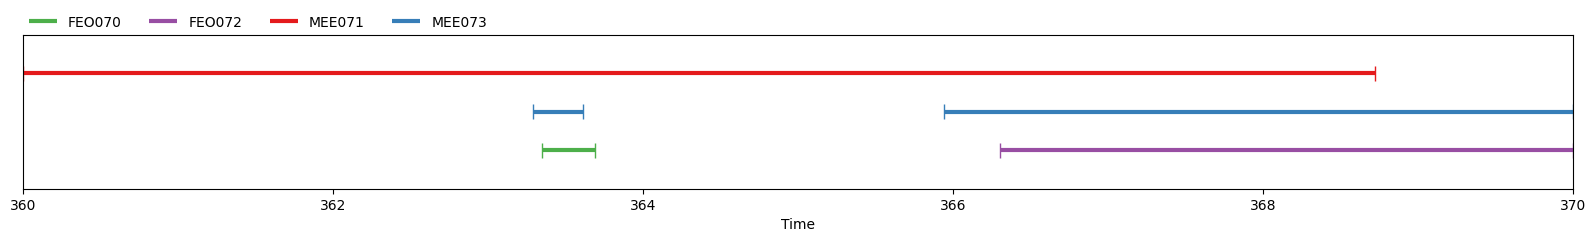

In [79]:
from pyannote.database.util import load_rttm
from pyannote.core import Segment, notebook

path = 'AMITest/test/EN2002b.rttm'
_, groundtruth = load_rttm(path).popitem()
notebook.reset()
EXCERPT = Segment(360, 370)
notebook.crop = EXCERPT
groundtruth

In [80]:
from IPython.display import Audio as IPythonAudio
import librosa

SAMPLE_RATE = 16000
path = 'AMITest/amicorpus/EN2002b/audio/EN2002b.Mix-Headset.wav'
waveform, _ = librosa.load(path, sr=SAMPLE_RATE)
IPythonAudio(waveform.flatten()[SAMPLE_RATE * 360 :SAMPLE_RATE * 370], rate=SAMPLE_RATE)

# Debug dataset class

In [1]:
import os

path = 'debug_make_trainpart/custom_train_pvad/data'
data = [x[1] for x in os.walk(path)][0]
path_speakers = 'debug_make_trainpart/custom_train_pvad/d_vectors'
speakers = [x[2] for x in os.walk(path_speakers)][0]
speakers = [x[:-4] for x in speakers]

In [2]:
from dataset import dataset

debug_dataset = dataset.AMIDataset(data, path, path_speakers, speakers)

In [3]:
stacked_input, labels = debug_dataset[0]

In [4]:
stacked_input.shape, labels.shape

(torch.Size([64, 296]), torch.Size([64]))

In [5]:
stacked_input.mean()

tensor(-0.4926, dtype=torch.float64)

In [6]:
stacked_input

tensor([[-1.1023, -0.5151, -0.3492,  ...,  0.0000,  0.0213,  0.0000],
        [-2.2058, -0.4357, -0.1925,  ...,  0.0000,  0.0213,  0.0000],
        [-2.0464, -0.5651, -0.4118,  ...,  0.0000,  0.0213,  0.0000],
        ...,
        [-2.9117, -2.4694, -1.2663,  ...,  0.0000,  0.0213,  0.0000],
        [-3.3548, -2.8184, -1.4367,  ...,  0.0000,  0.0213,  0.0000],
        [-2.8075, -2.6897, -1.4682,  ...,  0.0000,  0.0213,  0.0000]],
       dtype=torch.float64)

In [7]:
from torch.utils.data import DataLoader

batch_size = 64

debug_dl = DataLoader(debug_dataset, shuffle=True, batch_size=batch_size)

# Debug model

In [8]:
from model import model
import torch

input_dim = 296
hidden_dim = 64
num_layers = 2
out_dim = 3
pvad = model.PersonalVAD(input_dim, hidden_dim, num_layers, out_dim)
pvad = pvad.to(torch.float)

In [9]:
for batch in debug_dl:
    x_input = batch[0].to(torch.float)
    out, _ = pvad(x_input)
    print(out.shape)
    break

torch.Size([64, 64, 3])


# Debug train loop

In [10]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(pvad.parameters(), lr=5e-5)
path_checkpoint = 'debug_checkpoint.pt'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
from train import train

In [12]:
train.train_loop(pvad, criterion, optimizer, path_checkpoint, debug_dl, debug_dl, device)

100%|███████████████████████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.85it/s]
Mean train loss per epoch 1: 1.042023298740387
Mean train accuracy per epoch 1: 0.3473681640625
Mean train f1-score per epoch 1: 0.3473681640625
Mean train map-score per epoch 1: 0.39734408850628605
100%|███████████████████████████████████████████████████████████████████████████████████| 50/50 [00:21<00:00,  2.31it/s]
Mean val loss per epoch 1: 0.9971695327758789
Mean val accuracy per epoch 1: 0.487939453125
Mean val f1-score per epoch 1: 0.487939453125
Mean val map-score per epoch 1: 0.47478208947125167
100%|███████████████████████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.55it/s]
Mean train loss per epoch 2: 0.9570901358127594
Mean train accuracy per epoch 2: 0.5741796875
Mean train f1-score per epoch 2: 0.5741796875
Mean train map-score per epoch 2: 0.5576192027464874
100%|██████████████████████████████████████████████████

In [16]:
import numpy as np
targets = [0, 1, 1, 2]

np.eye(3)[targets]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [15]:
from tqdm import tqdm

for i in tqdm(range(10), position=0):
    print(i)

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49991.70it/s]

0
1
2
3
4
5
6
7
8
9
